<a href="https://colab.research.google.com/github/johnny080524/Assigement/blob/master/Machine_Learning_Spring_32513_A2_ShenChuan_Lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Spring 32513
13432772
SHEN-CHUAN LIN



# Introduction
The report uses the dataset which is crime incident reports are provided by the Boston Police Department. The data is collected by the crime incident report system which recorded the type of incident and where and when did incidents happen. The problems the article wants to analyze shows below:
1.	What kinds of crimes are most common?
2.	Where did the crime happen?
3.	When did the crime occur?
4.	After finding out the frequency of the crime, and does its frequency changed over a day, week, or month?

The first question defines the majority type of crimes, which can figure out the reason for the crime. The second question, the location detail helps police to predict the next crimes might happen in the place that has been secured to prevent the crime. The third question, the time data illustrates that the maximum probability in the specific time range the crime might happen. The accurate time increases the probability of prediction that raises the efficiency of crime prevention. The result from the question above demonstrates what, where, and when the crime occurred that the accurate estimation of the location might have the highest chance for the crime happened. However, the crime rate could change by the time, which has a high peak and a low peak in a year. The last question aims to analyze the peak of the crime to enhance the efficiency of crime prevention for the Boston Police Department.





# Exploration
At the beginning of the data exploration, there are over 50 types of crimes have recorded in the document, which makes estimation difficultly. Thus, the report will not analyze those small amounts of data and focus on major crimes. Using the filter to select crimes that meet our requirement. The data plan and data model are listed below.

•	Checking missing values
This step is checking the missing value in each column delete the value to minimize the effect from noise data. The missing value has marked as a nan that improves errors and accuracy.

•	Checking anomalies
Anomalies have occurred in columns that drop the quality of data. It has removed from the data to improve quality.

•	Remove duplicates
Duplicates have found out in INCIDENT_NUMBER column that one number has multiple records. Applying the column that associates with other data might decrease accuracy. The report drops INCIDIENT_NUMBER and OFFENSE_CODE because these two columns can replace by OFFENSE_CODE_GROUP. 

•	Data preparation
The step is going to turn the character into numerical values. DATE_OF_WEEK and UCR_PART are turned in to numerical values. Each row would have only one true value in columns. If the data point is a Monday in DATE_OF_WEEK and other data point is a part one in UCR_PART, then there will have a 1 in the Monday and part one columns and a 0 in all other columns.

•	Training and Testing set
It is a final step of data preparation. The dataset is split into training and test data. The data will randomly split into those datasets above to get a representation of all data points.

•	Train Model
The model the report chose to create and train is the random forest model. The process of the step can be provided from Scikit-learn.

•	Determine the performance metric
Calculating the accuracy from the result of random forest makes sure the quality of data that has prepared is in good condition.



# Methodology


# 1.   Import dataset from google drive - Crime in Boston




In [1]:
!pip install pydrive

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import xarray as xr  
COLAB = True


In [3]:
try:
    import netCDF4
except:
    !pip install netcdf4
import xarray as xr    

     |████████████████████████████████| 4.1MB 43kB/s 
     |████████████████████████████████| 307kB 41.4MB/s 


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/open?id=1HRH-z_4LysGI85MuCIGQySOtChx2_VuS' 
# The shareable link
fluff, id = link.split('=')
print (id) 
# Verify that you have everything after '='

1HRH-z_4LysGI85MuCIGQySOtChx2_VuS


# 2.   Data cleaning

In [6]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('crime1.csv')  
df3 = pd.read_csv('crime1.csv')
# Dataset is now stored in a Pandas Dataframe
df3.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018/9/2 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018/8/21 00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018/9/3 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018/9/3 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018/9/3 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018/9/3 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018/9/3 21:25,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018/9/3 20:39,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018/9/3 20:48,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018/9/3 20:38,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [7]:
len(df3)

319073

In [8]:
df3.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [10]:
#Check and eventually remove duplicates.
print(df3.shape, df3.drop_duplicates().shape)
df3 = df3.drop_duplicates()

(319073, 17) (319050, 17)


In [9]:
df3['OFFENSE_CODE_GROUP']

0                                  Larceny
1                                Vandalism
2                                    Towed
3                     Investigate Property
4                     Investigate Property
5          Motor Vehicle Accident Response
6                               Auto Theft
7                          Verbal Disputes
8                                  Robbery
9                          Verbal Disputes
10                         Verbal Disputes
11                    Investigate Property
12                    Fire Related Reports
13                                   Other
14                           Property Lost
15                      Medical Assistance
16                         Verbal Disputes
17        Assembly or Gathering Violations
18                                   Other
19              Larceny From Motor Vehicle
20                      Medical Assistance
21         Motor Vehicle Accident Response
22                      Medical Assistance
23         

In [0]:
df3['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Medical Assistance', 'Assembly or Gathering Violations',
       'Larceny From Motor Vehicle', 'Residential Burglary',
       'Simple Assault', 'Restraining Order Violations', 'Violations',
       'Harassment', 'Ballistics', 'Property Found',
       'Police Service Incidents', 'Drug Violation', 'Warrant Arrests',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Aggravated Assault', 'License Plate Related Incidents',
       'Firearm Violations', 'Other Burglary', 'Arson', 'Bomb Hoax',
       'Harbor Related Incidents', 'Counterfeiting', 'Liquor Violation',
       'Firearm Discovery', 'Landlord/Tenant Disputes',
       'Missing Person Located', 'Auto Theft Recovery', 'Service',
       'Operating Und

In [0]:
df3['OFFENSE_CODE_GROUP'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
Drug Violation                               16548
Simple Assault                               15826
Vandalism                                    15415
Verbal Disputes                              13099
Towed                                        11287
Investigate Property                         11124
Larceny From Motor Vehicle                   10847
Property Lost                                 9751
Warrant Arrests                               8407
Aggravated Assault                            7807
Violations                                    6095
Fraud                                         5829
Residential Burglary                          5606
Missing Person Located                        4958
Auto Theft                     

In [0]:
MotorVehicleAccidentResponse_data = df3.loc[df3['OFFENSE_CODE_GROUP'] == "Motor Vehicle Accident Response"]

In [0]:
MotorVehicleAccidentResponse_data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018/9/3 21:09,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
21,I182070911,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,A1,69,NaN,2018/9/3 18:30,2018,9,Monday,18,Part Three,BEACON ST,42.355644,-71.071681,"(42.35564426, -71.07168077)"
23,I182070909,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,E5,550,NaN,2018/9/3 18:33,2018,9,Monday,18,Part Three,WASHINGTON ST,42.275818,-71.139913,"(42.27581799, -71.13991259)"
25,I182070906,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2018/9/3 18:20,2018,9,Monday,18,Part Three,NaN,42.283593,-71.055657,"(42.28359328, -71.05565683)"
44,I182070886,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY AMAGE,C11,402,NaN,2018/9/3 15:34,2018,9,Monday,15,Part Three,WASHINGTON ST,42.284926,-71.071353,"(42.28492596, -71.07135254)"


In [0]:
MotorVehicleAccidentResponse_data['DISTRICT'].value_counts()

B2     6407
C11    5305
D4     3882
B3     3836
D14    2857
A1     2847
C6     2699
E18    2366
E13    2166
E5     1813
A7     1516
A15     960
Name: DISTRICT, dtype: int64

In [0]:
MotorVehicleAccidentResponse_B2 = MotorVehicleAccidentResponse_data.loc[MotorVehicleAccidentResponse_data['DISTRICT'] == 'B2']

In [0]:
MotorVehicleAccidentResponse_B2.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
46,I182070882,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,901,NaN,2018/9/3 15:00,2018,9,Monday,15,Part Three,WARD ST,42.335111,-71.095922,"(42.33511145, -71.09592156)"
64,I182070862,3801,Motor Vehicle Accident Response,M/V ACCIDENT - OTHER,B2,603,NaN,2018/9/3 15:29,2018,9,Monday,15,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
115,I182070809,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,605,NaN,2018/9/3 12:37,2018,9,Monday,12,Part Three,FISHER AVE,42.330610,-71.108536,"(42.33061023, -71.10853621)"
124,I182070801,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,326,NaN,2018/9/2 19:30,2018,9,Sunday,19,Part Three,LAWRENCE AVE,42.311611,-71.076256,"(42.31161123, -71.07625600)"
244,I182070657,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,B2,311,NaN,2018/9/2 20:32,2018,9,Sunday,20,Part Three,MARTIN LUTHER KING JR BLV,42.317916,-71.082156,"(42.31791574, -71.08215630)"


In [0]:
px.scatter(MotorVehicleAccidentResponse_B2.query('REPORTING_AREA == ["901"]'), 
           x="MONTH", y="DAY_OF_WEEK", color="REPORTING_AREA", trendline="ols")

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



ValueError: ignored

In [0]:
data = vc = df3['OFFENSE_CODE'].value_counts()
print (vc[vc > 2000])


3006    18783
3115    18754
3831    16323
1402    15154
802     14799
3301    13099
3410    11287
3114    11124
617      9074
2647     9042
614      8894
3201     8893
3125     8407
613      7953
3802     6557
619      5970
3803     5131
413      4887
1102     4414
3502     4365
2629     4007
3501     3766
3207     3698
724      3630
2610     3254
1106     3147
301      3056
3801     2925
423      2911
2900     2894
2907     2616
1849     2591
520      2585
3109     2559
522      2359
616      2268
1843     2109
Name: OFFENSE_CODE, dtype: int64


In [0]:
from pandas import read_csv
dataset = read_csv('crime1.csv', header=None)
print(dataset.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,8,9,11,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                0       1   ...             15                        16
count       319074  319074  ...  299075.000000                    319074
unique      282518     399  ...   26435.000000                     18195
top     I162030584    3115  ...     -71.082776  (0.00000000, 0.00000000)
freq            13   16755  ...    1120.000000                     19999

[4 rows x 17 columns]


In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [0]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,319073.0,2317.546956,1185.285543,111.000000,1001.000000,2907.000000,3201.000000,3831.000000
YEAR,319073.0,2016.560586,0.996344,2015.000000,2016.000000,2017.000000,2017.000000,2018.000000
MONTH,319073.0,6.609719,3.273691,1.000000,4.000000,7.000000,9.000000,12.000000
HOUR,319073.0,13.118205,6.294205,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,299074.0,42.214381,2.159766,-1.000000,42.297442,42.325538,42.348624,42.395042
Long,299074.0,-70.908272,3.493618,-71.178674,-71.097135,-71.077524,-71.062467,-1.000000


In [0]:
sns.catplot(y='vc',
           kind='count',
            height=10, 
            aspect=2,
            order=df3.vc.value_counts().index,
           data=df3)


AttributeError: ignored

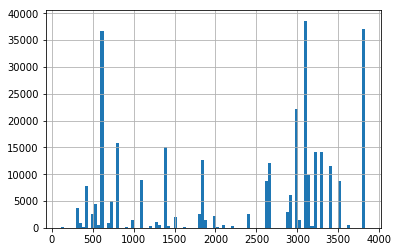

In [0]:
df3['OFFENSE_CODE'].hist(bins=100)

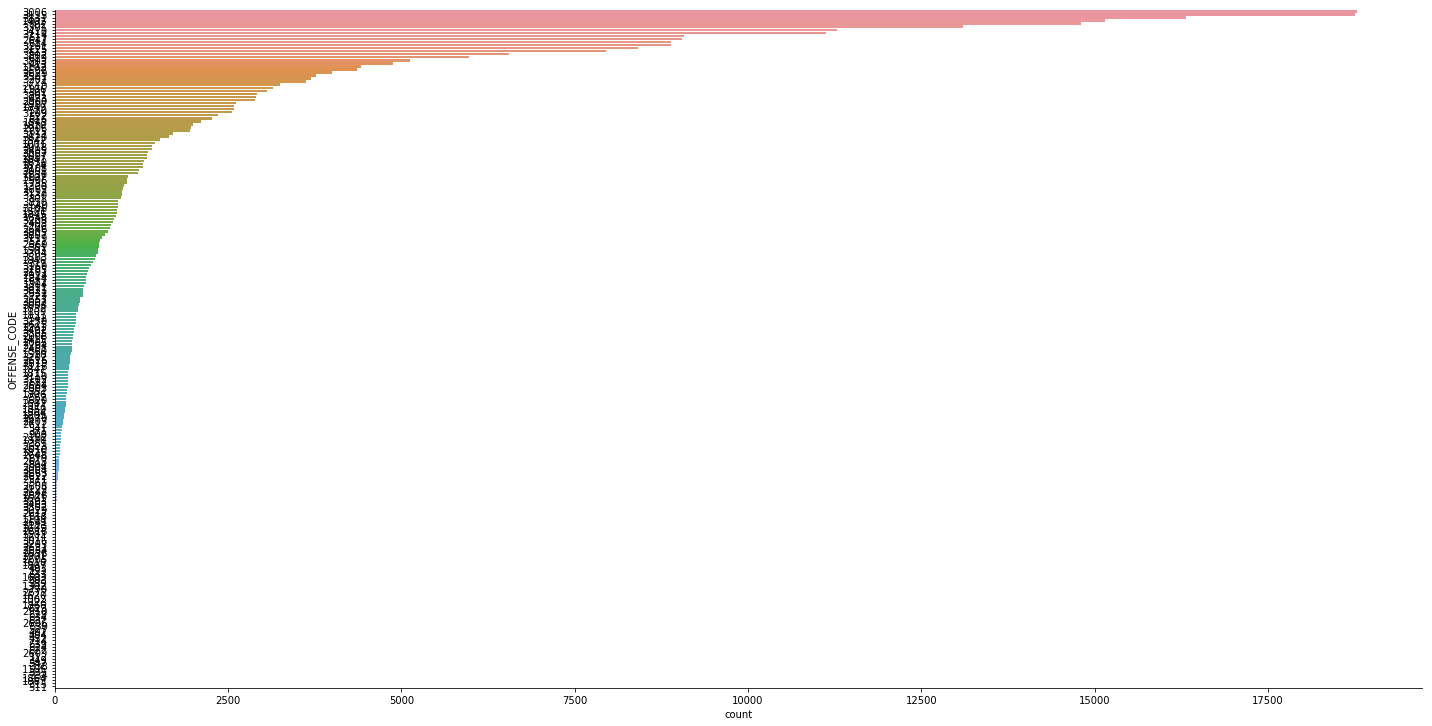

In [0]:
# Countplot for crime types
data = pd.read_csv("crime1.csv", index_col="INCIDENT_NUMBER")

sns.catplot(y='OFFENSE_CODE',
           kind='count',
            height=8, 
            aspect=1.5,
            order=data.OFFENSE_CODE.value_counts().index,
           data=data)

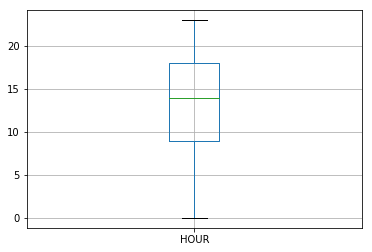

In [0]:
df3.boxplot(column='HOUR')

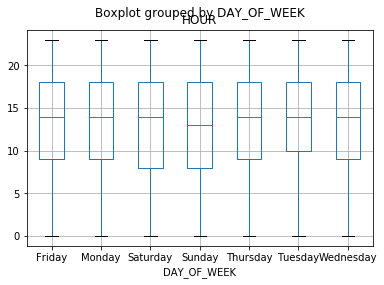

In [0]:
df3.boxplot(column='HOUR', by = 'DAY_OF_WEEK')

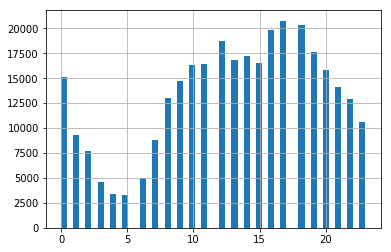

In [0]:
df3['HOUR'].hist(bins=50)

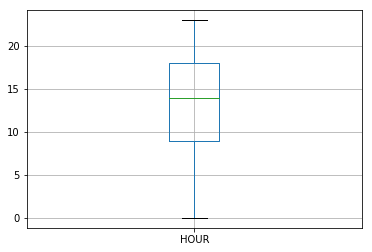

In [0]:
df3.boxplot(column='HOUR')

In [0]:
data = pd.read_csv("crime.csv", index_col="INCIDENT_NUMBER")



def num_missing(x):
  return sum(x.isnull())

#Apply per column:
print("missing values per column:")
print (data.apply(num_missing, axis=0))
#axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nmissing values per row:")
print (data.apply(num_missing, axis=1)).head()
#axis=1 defines that function is to be applied on each row

missing values per column:
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

missing values per row:
INCIDENT_NUMBER
I182070945       1
I182070943       1
I182070941       1
I182070940       1
I182070938       1
I182070936       1
I182070933       1
I182070932       1
I182070931       1
I182070929       1
I182070928       1
I182070927       1
I182070923       1
I182070922       1
I182070921       1
I182070920       3
I182070919       1
I182070918       1
I182070917       1
I182070915       1
I182070913       2
I182070911       1
I182070910       1
I1

AttributeError: ignored